In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# product_df = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
# count_df = pd.read_csv('unique-categories.sorted-by-count.csv')

In [ ]:
# product_df.head()

In [ ]:
# product_df = product_df.sample(frac=1)
# product_df.head(5)

In [ ]:
# df1 = product_df.iloc[:1473, :]
# df2 = product_df.iloc[1473:,:]
# df1.head(5)

# # print(len(df2['title']))

In [ ]:
# df1.to_csv('train.csv',sep = ',')
# df2.to_csv('test.csv',sep = ',')

# df1 = pd.read_csv('bay_train.csv',sep = ',')
df1 = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv',sep = ',')
# df2 = pd.read_csv('bay_test.csv',sep = ',')
# df1 = pd.read_csv('bay_test.csv',sep = ',')

In [ ]:
pr_var = df1['product_variation_size_id'].value_counts()
pr_var[pr_var > 1]

S               641
XS              356
M               200
XXS             100
L                49
S.               18
XL               17
XXL              15
XXXS              6
s                 5
4XL               5
XS.               5
Size S            5
M.                4
Size-XS           4
2XL               4
SIZE XS           4
SizeL             3
Size-S            3
33                3
2pcs              3
10 ml             3
34                3
One Size          2
29                2
S(bust 88cm)      2
5XL               2
XXXXXL            2
1 pc.             2
SIZE-XXS          2
1                 2
S Pink            2
Size S.           2
Size -XXS         2
35                2
3XL               2
size S            2
XXXXL             2
Size4XL           2
EU 35             2
Size M            2
Suit-S            2
25                2
Name: product_variation_size_id, dtype: int64

In [ ]:
# df1 = pd.read_csv('train.csv',sep = ',')
# df2 = pd.read_csv('test.csv',sep = ',')


pr_colr = df1['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               302
white               254
yellow              105
blue                 99
pink                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
winered              28
navyblue             28
orange               27
multicolor           20
beige                14
khaki                12
lightblue            12
gray                 11
white & green        10
rosered               8
skyblue               8
coffee                7
brown                 7
darkblue              6
floral                5
rose                  5
fluorescentgreen      4
lightpink             4
leopard               4
black & green         4
navy                  4
black & white         3
White                 3
orange-red            3
camouflage            3
Black                 3
lightgreen            3
Name: product_color, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


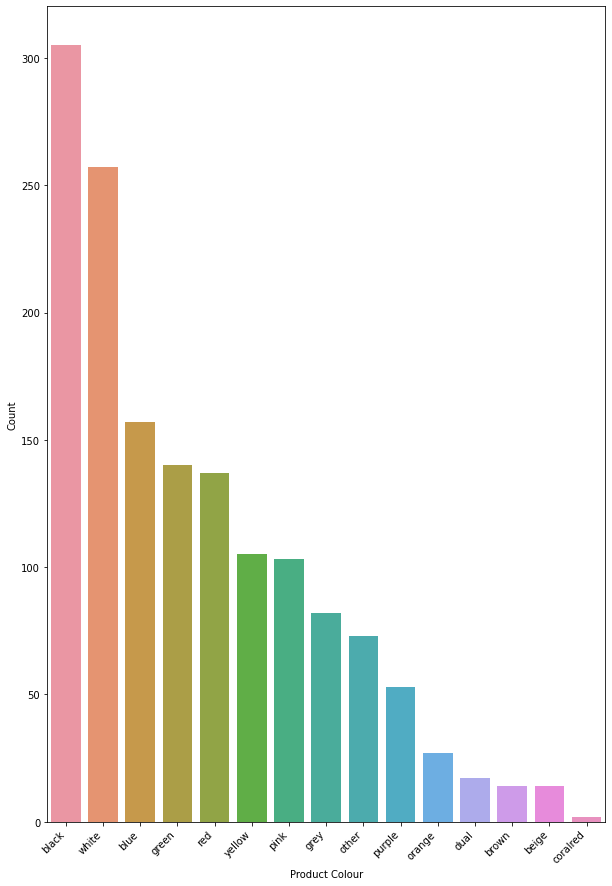

In [ ]:
#分析顏色

pr_colr = df1['product_color'].value_counts()
pr_colr[pr_colr > 2]


df1['product_color'] = df1['product_color'].replace('Black', 'black')
df1['product_color'] = df1['product_color'].replace('White', 'white')
df1['product_color'] = df1['product_color'].replace("(navyblue)|(lightblue)|(skyblue)|(darkblue)|(navy)", 'blue',regex=True)
df1['product_color'] = df1['product_color'].replace("(winered)|(rosered)|(rose)|(orange-red)", 'red',regex=True)
df1['product_color'] = df1['product_color'].replace('lightpink', 'pink')
df1['product_color'] = df1['product_color'].replace("(armygreen)|(khaki)|(lightgreen)|(fluorescentgreen)", 'green',regex=True)
df1['product_color'] = df1['product_color'].replace('gray', 'grey')
df1['product_color'] = df1['product_color'].replace('coffee', 'brown')
df1['product_color'] = df1['product_color'].replace("(multicolor)|(floral)|(leopard)|(camouflage)", 'other',regex=True)
df1['product_color'] = df1['product_color'].replace("(black & green)|(white & green)|(black & white)|(camouflage)", 'dual',regex=True)    
df1['product_color'] = df1['product_color'].replace(np.nan, 'other')

pr_colr = df1['product_color'].value_counts()
pr_colr[pr_colr > 2]

# Show Most popular colors
fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = df1,
              order = df1['product_color'].value_counts().iloc[:15].index,
              ax = ax)
ax.set(xlabel='Product Colour', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


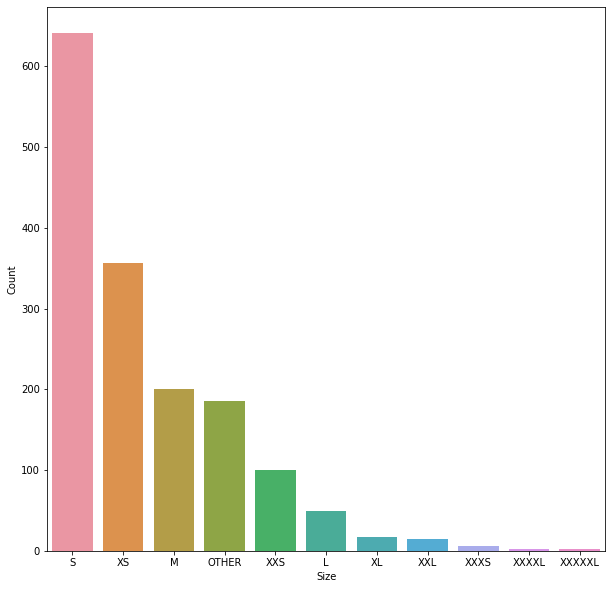

In [ ]:
#處理衣服 size
def pr_var(name):
    if name == 'XXXS' or name == 'XXS' or name == 'XS' or name == 'S' or name == 'M' or name == 'L' or name == 'XL' or name == 'XXL' or name == 'XXXXL'or name == 'XXXXXL':
        return name
    else:
        return "OTHER"
    
df1['product_variation_size_id'] = df1['product_variation_size_id'].replace(np.nan, 'OTHER')
df1['product_variation_size_id'] = df1['product_variation_size_id'].apply(pr_var)
# cpr_var = df1['product_variation_size_id'].value_counts()
# cpr_var[cpr_var > 1]

#draw
# pr_var = salesData['product_variation_size_id'].value_counts()
# pr_var[pr_var > 1]

fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = df1['product_variation_size_id'].value_counts().index,
              data = df1,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


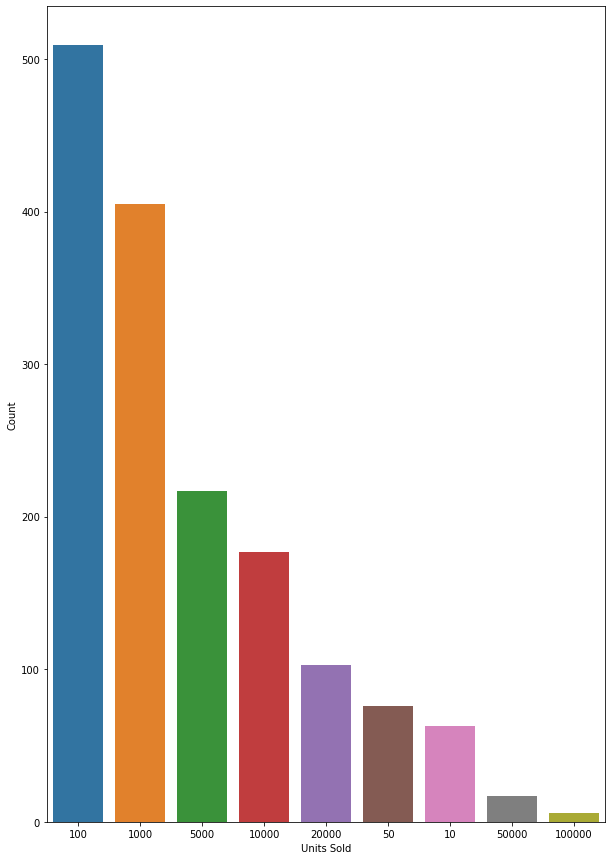

In [ ]:
def pr_units(item):
    if item == 10 or item == 50 or item == 100 or item == 1000 or item == 5000 or item == 10000 or item == 20000 or item == 50000 or item == 100000:
      return item
    else:
        return 10

df1['units_sold'] = df1['units_sold'].apply(pr_units)
pr_unit = df1['units_sold'].value_counts()

fig_dims = (10, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('units_sold',
              data = df1,
              order = df1['units_sold'].value_counts().index,
              ax = ax)
ax.set(xlabel='Units Sold', ylabel='Count')
plt.show()



In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [ ]:
cate_data = pd.read_csv("unique-categories.sorted-by-count.csv")
pop_tags = cate_data.iloc[:10]['keyword'].tolist()

def check_tag_quality(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    
    common_elements = np.intersect1d(pop_tags, prod_tags)
    return len(common_elements) / len(pop_tags)
    
df1['tag_quality'] = df1['tags'].apply(check_tag_quality)

In [ ]:
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
df1['tag_count'] = df1['tags'].apply(tag_count)

In [ ]:
def is_localised(trans,origi):
    if trans == origi:
        return 0
    else:
        return 1
    
df1['title_localised'] = df1.apply(lambda x: is_localised(x.title, x.title_orig), axis = 1)

In [ ]:
def check_name(title,name):
    title = str(title).replace(" ", "")
    title = title.replace(".", "")
    
    name = str(name).replace(" ", "")
    name = name.replace(".", "")
    
    if title.lower() == name.lower():
        return 1
    else:
        return 0
    
df1['com_same_name'] = df1.apply(lambda x: check_name(x.merchant_title, x.merchant_name), axis = 1)



In [ ]:
def inc_positive_per(wordset):
    pos_ses = 'avis positifs'
    if f'{pos_ses}' in f'{wordset}':
        return 1
    else:
        return 0
    
df1['subtitle_rating'] = df1['merchant_info_subtitle'].apply(inc_positive_per)
# print(df1['subtitle_rating'] )

In [ ]:
def check_rating_prop(s_count,t_count):
  # count=0
  # print("s_count: ",s_count)
  # print("t_count: ",t_count)
  if s_count == 0 :
    return 0
  elif t_count==0:
    # count+=1
    # print(count)
    return None
  else:
    return s_count/t_count
  print("count: ",count)
# count=0
df1['rating_five_count'] = df1.apply(lambda x: check_rating_prop(x.rating_five_count, x.rating_count),axis = 1)
# print("count: ",count)
df1['rating_four_count'] = df1.apply(lambda x: check_rating_prop(x.rating_four_count, x.rating_count), axis = 1)
df1['rating_three_count'] = df1.apply(lambda x: check_rating_prop(x.rating_three_count, x.rating_count), axis = 1)
df1['rating_two_count'] = df1.apply(lambda x: check_rating_prop(x.rating_two_count, x.rating_count), axis = 1)
df1['rating_one_count'] = df1.apply(lambda x: check_rating_prop(x.rating_one_count, x.rating_count), axis = 1)

In [ ]:
def check_dis_per(r_price,buyer_price):
    return (r_price - buyer_price) / r_price
    
df1['discount_rate'] = df1.apply(lambda x: check_dis_per(x.retail_price, x.price),axis = 1)



In [ ]:
def merchant_pop_on_prod(m_count,p_count):
    if m_count == 0:
        return 0
    else:
        return p_count / m_count
    
df1['merch_pop_proc'] = df1.apply(lambda x: merchant_pop_on_prod(x.merchant_rating_count, x.rating_count),axis = 1)



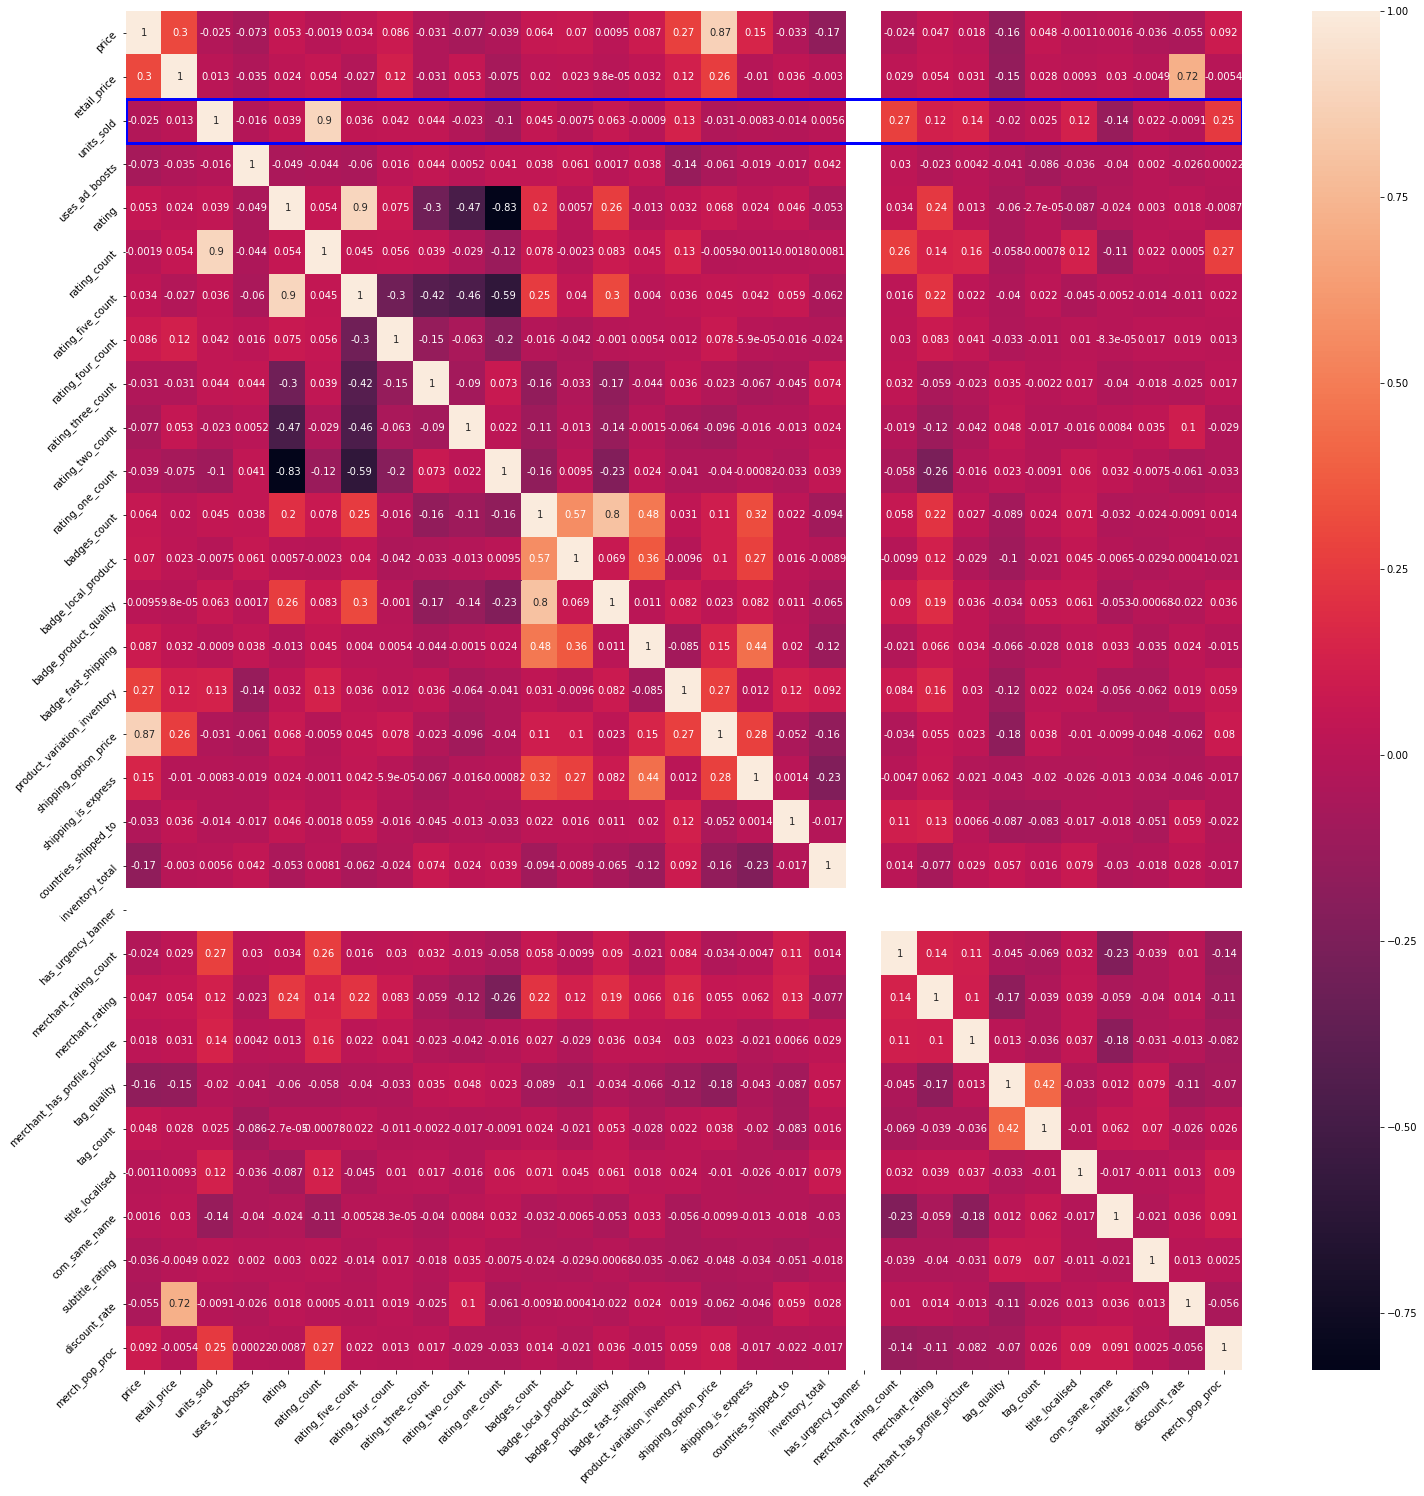

In [ ]:
fig_dims = (25, 25)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df1.corr(),
            annot=True,
            ax=ax)
ax.add_patch(plt.Rectangle((0,2),31,1, 
                           fill = False, 
                           edgecolor = 'blue', 
                           lw = 3))
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

###  最相關：Rating Count  0.90
###  Merchant Rating Count:  0.27
###  Merchant pop  proc  :0.25
###  Others


Major Factors which increases the 'units_sold'

    Rating Count
    Rating
    Rating Five Count
    Rating Four Count
    Rating Three Count
    Merchant Rating Count
    Merchant Rating
    Merchant Has Profile Picture
    Is Title Localised
    Rating
    Badge Product Quality
    Badges Count
    Product Variation Inventory
    Number of Tags
    Title Localised
    Number Of Tags
    Have Rating on Merchant Subtitle
    High Retail Price
    High Buyer Price

Major Factors which decreases the 'units_sold'

    Rating Two Count
    Rating One Count
    Price Increment
    Shipping Price Increment
    If Merchant title and Merchant name has differnt names
    No Urgency Banner
    High Price (Buyer Price)
    Lower discount rate (Buyer price compare to retail price)

Special Note :-

Add Boost does not have any significant change to the 'units_sold'




In [ ]:
#clean  data
df1 = df1.drop(['crawl_month','product_id','product_picture', 'product_url', 'merchant_profile_picture', 'merchant_id', 'currency_buyer'], axis = 1)
df1 = df1.drop(['theme','urgency_text', 'merchant_title', 'merchant_name', 'merchant_info_subtitle'], axis = 1)
df1 = df1.drop(['title','title_orig','tags'], axis = 1)
df1 = df1.drop(['shipping_option_name'], axis = 1)
df1 = df1.drop(['rating_count'], axis = 1)
print("ddoonnee")

ddoonnee


In [ ]:
# df1  =  df1.drop(['iinnddeexx'], axis = 1)
print(df1.head())


   price  retail_price  ...  discount_rate  merch_pop_proc
0  16.00            14  ...      -0.142857        0.095070
1   8.00            22  ...       0.636364        0.345595
2   8.00            43  ...       0.813953        0.047458
3   8.00             8  ...       0.000000        0.024295
4   2.72             3  ...       0.093333        0.001381

[5 rows x 33 columns]


In [ ]:
df1 = pd.get_dummies(df1,columns = ['product_color'],prefix = 'color_', drop_first = True)
df1.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tag_quality,tag_count,title_localised,com_same_name,subtitle_rating,discount_rate,merch_pop_proc,color__Blue,color__Pink,color__RED,color__Rose red,color__applegreen,color__apricot,color__army,color__army green,...,color__light green,color__lightgray,color__lightgreen,color__lightgrey,color__lightpurple,color__lightred,color__lightyellow,color__mintgreen,color__nude,color__offblack,color__offwhite,color__orange,color__orange & other,color__other,color__otherprint,color__pink,color__pink & black,color__pink & blue,color__pink & grey,color__pink & white,color__prussianblue,color__purple,color__rainbow,color__red,color__red & blue,color__red & yellow,color__redgold,color__silver,color__star,color__tan,color__violet,color__watermelonred,color__white,color__white & black,color__white & red,color__whiteother,color__whitestripe,color__wine,color__wine red,color__yellow
0,16.00,14,100,0,3.76,0.481481,0.148148,0.185185,0.018519,0.166667,0,0,0,0,M,50,4,0,34,50,1.0,CN,568,4.128521,0,0.7,24,0,1,0,-0.142857,0.095070,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,8.00,22,20000,1,3.45,0.369845,0.167400,0.182233,0.104971,0.175550,0,0,0,0,XS,50,2,0,41,50,1.0,CN,17752,3.899673,0,0.5,15,1,1,1,0.636364,0.345595,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8.00,43,100,0,3.57,0.357143,0.285714,0.142857,0.000000,0.214286,0,0,0,0,XS,1,3,0,36,50,1.0,CN,295,3.989831,0,0.3,19,1,1,1,0.813953,0.047458,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,8.00,8,5000,1,4.03,0.509499,0.205527,0.150259,0.072539,0.062176,0,0,0,0,M,50,2,0,41,50,NaN,CN,23832,4.020435,0,0.6,18,1,1,0,0.000000,0.024295,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.72,3,100,1,3.10,0.300000,0.200000,0.100000,0.100000,0.300000,0,0,0,0,S,1,1,0,35,50,1.0,CN,14482,4.001588,0,0.6,13,1,0,1,0.093333,0.001381,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1 = pd.get_dummies(df1, columns = ['product_variation_size_id'],prefix = 'size_',drop_first = True)
df1 = pd.get_dummies(df1, columns = ['origin_country'],prefix = 'country_',drop_first = True)

In [ ]:
df1.head()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,tag_quality,tag_count,title_localised,com_same_name,subtitle_rating,discount_rate,merch_pop_proc,color__Blue,color__Pink,color__RED,color__Rose red,color__applegreen,color__apricot,color__army,color__army green,color__beige,color__black,...,color__pink,color__pink & black,color__pink & blue,color__pink & grey,color__pink & white,color__prussianblue,color__purple,color__rainbow,color__red,color__red & blue,color__red & yellow,color__redgold,color__silver,color__star,color__tan,color__violet,color__watermelonred,color__white,color__white & black,color__white & red,color__whiteother,color__whitestripe,color__wine,color__wine red,color__yellow,size__M,size__OTHER,size__S,size__XL,size__XS,size__XXL,size__XXS,size__XXXS,size__XXXXL,size__XXXXXL,country__CN,country__GB,country__SG,country__US,country__VE
0,16.00,14,100,0,3.76,0.481481,0.148148,0.185185,0.018519,0.166667,0,0,0,0,50,4,0,34,50,1.0,568,4.128521,0,0.7,24,0,1,0,-0.142857,0.095070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,8.00,22,20000,1,3.45,0.369845,0.167400,0.182233,0.104971,0.175550,0,0,0,0,50,2,0,41,50,1.0,17752,3.899673,0,0.5,15,1,1,1,0.636364,0.345595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,8.00,43,100,0,3.57,0.357143,0.285714,0.142857,0.000000,0.214286,0,0,0,0,1,3,0,36,50,1.0,295,3.989831,0,0.3,19,1,1,1,0.813953,0.047458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,8.00,8,5000,1,4.03,0.509499,0.205527,0.150259,0.072539,0.062176,0,0,0,0,50,2,0,41,50,NaN,23832,4.020435,0,0.6,18,1,1,0,0.000000,0.024295,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.72,3,100,1,3.10,0.300000,0.200000,0.100000,0.100000,0.300000,0,0,0,0,1,1,0,35,50,1.0,14482,4.001588,0,0.6,13,1,0,1,0.093333,0.001381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# df1.to_csv('preprocessed_train.csv')
df1.to_csv('preprocessed.csv')

In [ ]:
df1.info

<bound method DataFrame.info of       price  retail_price  units_sold  ...  country__SG  country__US  country__VE
0     16.00            14         100  ...            0            0            0
1      8.00            22       20000  ...            0            0            0
2      8.00            43         100  ...            0            0            0
3      8.00             8        5000  ...            0            0            0
4      2.72             3         100  ...            0            0            0
...     ...           ...         ...  ...          ...          ...          ...
1568   6.00             9       10000  ...            0            0            0
1569   2.00            56         100  ...            0            0            0
1570   5.00            19         100  ...            0            0            0
1571  13.00            11         100  ...            0            0            0
1572   7.00             6         100  ...            0           